Regresion Logıstica
IMPORTANTE: En este ejercicio solamente se podra importar numpy, matplotlib.pyplot
y la base de datos a utilizar (el resto debera ser implementacion propia).
La base de datos MNIST posee imagenes de los dıgitos manuscritos (del 0 al 9). Se desea entrenar un
clasificador que, a partir de una imagen, prediga si el dıgito que aparece en ella es par o impar.
(a) Exploracion de Datos:
1. Cargar la base de datos utilizando tensorflow.keras.datasets.mnist.load_data.
2. Utilizando imshow (matplotlib) represente 10 muestras del conjunto de testeo elegidas al azar.
3. Tanto para el conjunto de entrenamiento como el de testeo, generar las etiquetas necesarias para
esta tarea.

#Trabajo practico 3- Regresion Logistica

In [ ]:
#### IMPORTO LIBRERIAS
#import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
import matplotlib.pyplot as plt


##(a) Exploracion de Datos:

###1. Cargar la base de datos utilizando tensorflow.keras.datasets.mnist.load_data.

In [ ]:
#### Importo la base de datos
(x_train, y_train), (x_test, y_test) = load_data()

###2. Utilizando imshow (matplotlib) represente 10 muestras del conjunto de testeo elegidas al azar.

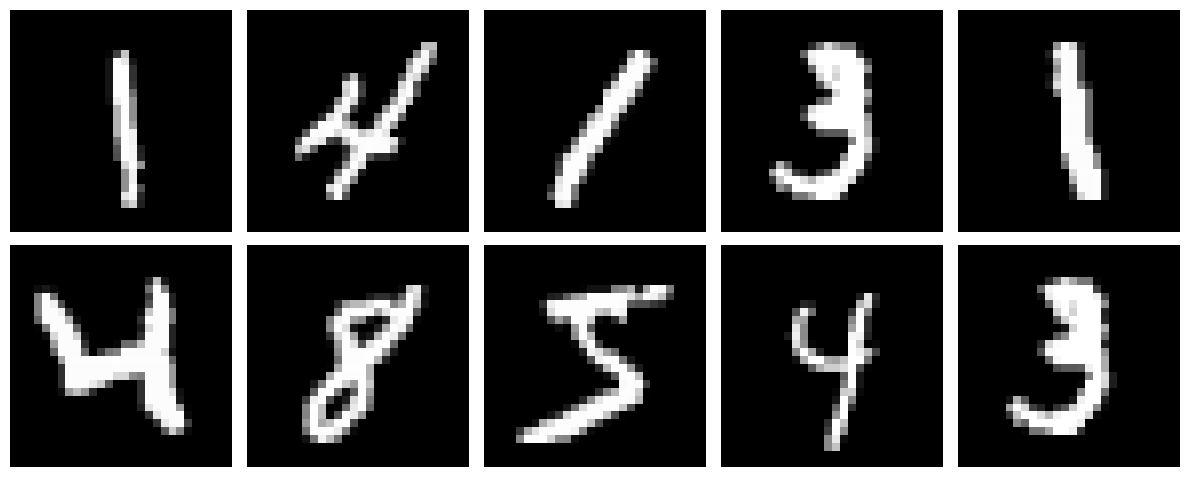

In [ ]:
#Primero, tengo que generar 10 numeros enteros entre 0 y el tamanio del conjunto de testeo para ver que indices elegir
rand_vals = np.random.randint(0,np.size(x_train,1),10)
rand_imgs = x_train[rand_vals]

# Crear figura con 2 filas x 5 columnas
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

# aplano los ejes para poder iterar
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(rand_imgs[i], cmap="gray")  # agrega cmap="gray" si son imágenes en escala de grises
    axes[i].axis("off")  # ocultar los ejes

plt.tight_layout()
plt.show()

###3. Tanto para el conjunto de entrenamiento como el de testeo, generar las etiquetas necesarias para esta tarea.

In [ ]:
#print(y_train)
# Labels par/impar
y_train_par = (y_train % 2 == 0).astype(int)
y_test_par  = (y_test % 2 == 0).astype(int)
#y_train = np.isin(y_train, [1, 3, 5, 7, 9]).astype(int)
#y_test = np.isin(y_test,[1,3,5,7,9]).astype(int)
###Tengo 1 si un digito es impar, 0 si un digito es par.

Debuggings varios

In [ ]:
#print(y_train)
#print(y_test)
#Cada x[i] tiene una imagen puesta
#np.shape(x_train[1]) 28x28 cada una de las fotos.
#print(x_train[1]) Tengo filas y columnas negras completamente,
#deberia descartarlas porque no me sirve para nada tener una columna de ceros o una fila de ceros.
#x_train_vars = x_train.var(axis=0)
#mascara = x_train_vars > 0 #Devuelve un array con 1 y 0s segun si cumplen cada una
#x_train = x_train[:,mascara] #Me quedo con todos los que tienen varianza nula
#np.shape(x_train[1]) #Ahora tengo 717 y menos 1s y 0s porque se eliminaron del set de entrenamiento (antes eran 784).
#print(x_train[1]) #Tengo filas y columnas negras completamente,

## Preprocesamiento
### 1. Implementar la normalizacion (estandarizacion). La misma debe descartar los features con varianza nula, centrar y escalar (volviendo la media nula y la varianza unitaria). El codigo debe estar estructurado de la siguiente manera:

In [ ]:
class Normalizar:
  ###Opcional para inicializar atributos o declarar hiperparametros
  ###Espera tener una matriz 2D de (muestras,columnas), hay que hacer la transformacion
  ###sobre el conhjunto ANTES de llamarla o debe tirar error.
  def __init__(self):
    self.u = None
    self.var = None
    self.mask = None
  #Etapa de entrenamiento
  def fit(self,X):
    #El fit tiene que agarrar un X de entrenamiento y aprender los parametros,
    #tiene que guardar los valores para mis X que estoy tocando
    ####Limpio las features con var nula###
    X_var = X.var(axis=0)
    self.mask = X_var > 0 #Devuelve un array con 1 y 0s segun si cumplen cada una
    X_var_nonula = X[:,self.mask] #Me quedo con todos los que tienen varianza no nula
    ###Computo los valores en 2 pasos.
    self.u = np.mean(X_var_nonula,axis=0)
    self.var = np.var(X_var_nonula,axis=0)
  #Aplicar la transformacion
  def transform(self,X):
    #Le sumo un poco de manejo de errores por si es que explota la cuenta
  #  try:
      X = X[:,self.mask]
      X = (X - self.u)/np.sqrt(self.var)
      return X
  #  except Exception as e:
   #  # print("Falla en transformacion, u, var o X son nulos, se llamo a fit?. Error: ",e)
  #Entrenar y aplicar la transformacion
  def fit_transform(self,X):
    self.fit(X)
    return self.transform(X)





En fit aprendo los parametros de lo que le estoy haciendo a mis datos (en este caso es solamente normalizar asi que aprendo la media y la varianza para hacer la transformacion tipica y despues con transform le aplico las formulas para llevarlo realmente a una var normalizada). Tambien en fit fijo la mascara que tienen mis datos con las columnas que tienen varianza nula (por ejemplo los bordes de las esquinas nunca tienen datos, no hace falta ajustarlo con respecto a eso)

### Análisis Teórico de la Regresión Logística Binaria

#### 1. Función sigmoide inversa

Sea la función sigmoide:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}, \quad \sigma: \mathbb{R} \to (0,1)
$$

Para $p \in (0,1)$, despejando $z$ de $p = \sigma(z)$:

$$
p = \frac{1}{1 + e^{-z}} \implies 1 + e^{-z} = \frac{1}{p} \implies e^{-z} = \frac{1-p}{p} \implies z = \log\frac{p}{1-p}
$$

Así obtenemos la función inversa:

$$
\sigma^{-1}(p) = \log \frac{p}{1-p}
$$

---

#### 2. Derivada de la sigmoide

Aplicando la regla de la cadena:

$$
\sigma'(z) = \frac{d}{dz} \frac{1}{1+e^{-z}} = -\frac{1}{(1+e^{-z})^2} (-e^{-z}) = \frac{e^{-z}}{(1+e^{-z})^2}
$$

Reescribiendo en términos de $\sigma(z)$:

$$
\sigma'(z) = \sigma(z)(1-\sigma(z))
$$

Si definimos $p = \sigma(z)$, entonces:

$$
\sigma'(z) = p (1-p)
$$


---

#### 3. Función de costo (log-loss / cross-entropy)

Para un ejemplo $(x,y)$, la log-loss es:


$$
\ell(x,y) =
\begin{cases}
- \log(1-\sigma(w^T x + b)), & y=0\\[2mm]
- \log(\sigma(w^T x + b)), & y=1
\end{cases}
$$

De manera equivalente, cuando y vale 0 va a valer la ecuacion 1 y viceversa.:

$$
\ell(x,y) = -(1-y)\log(1-\sigma(w^T x + b)) - y \log(\sigma(w^T x + b))
$$



Se puede pensar el primer sumando como que se penaliza al modelo mucho cuando la etiqueta real era cero si la probabilidad de que sea uno es alta y viceversa. Es el costo de equivocarse contra la clase verdadera.


---

#### 4. Gradientes de la función de costo

Usando la regla de la cadena, para un solo ejemplo:
Definiendo
$$ z = w^T x + b $$
\begin{align}
\frac{\partial \ell(x,y)}{\partial w} &= x \, \sigma(z)(1-\sigma(z)) \left[ \frac{1-y}{1-\sigma(z)} - \frac{y}{\sigma(z)} \right] \\[1em]
&= x \, [\sigma(z) - y] \\[0.5em]
\frac{\partial \ell(x,y)}{\partial b} &= \sigma(z) - y
\end{align}



---

#### 5. Gradiente del riesgo empírico

Definiendo el riesgo empírico sobre $n_{\text{tr}}$ ejemplos:

$$
J(w,b) = \frac{1}{n_{\text{tr}}} \sum_{i=1}^{n_{\text{tr}}} \ell(x_i, y_i)
$$

Los gradientes promedio:

$$
\frac{\partial J}{\partial w} = \frac{1}{n_{\text{tr}}} \sum_{i=1}^{n_{\text{tr}}} x_i [\sigma(w^T x_i + b) - y_i], \quad
\frac{\partial J}{\partial b} = \frac{1}{n_{\text{tr}}} \sum_{i=1}^{n_{\text{tr}}} [\sigma(w^T x_i + b) - y_i]
$$

Lograr que estos gradientes sean nulos tiende a inducir:

$$
y_i \approx \sigma(w^T x_i + b)
$$

lo que es la interpretación de que el modelo ajusta las probabilidades a las etiquetas observadas.


## Regresion Logistica

In [ ]:
#Tiene que manejar la logica para recibir un X, fijar los atributos
class RegresionLogistica:
  ###Opcional, para inicializar atributos o declarar hiperparametros
  def __init__(self,num_iters=1000,lr=0.01):
    self.w = None
    self.b = None
    self.num_iters = num_iters
    self.lr = lr
    self.riesgo_train = []
  #Entrenamiento
  def fit(self,X,y):
    m, n = X.shape
    # Inicializar pesos y sesgo
    self.w = np.zeros(n)
    self.b = 0

    for i in range(self.num_iters):
        #Transformo mi observacion en la regresion con los parametros
        z = np.dot(X, self.w) + self.b
        y_hat = 1 / (1 + np.exp(-z)) #Hago la probabilidad (prediccion)

        # Gradientes
        dw = (1/m) * np.dot(X.T, (y_hat - y)) #Hago el gradiente que saque antes, es el error por la muestra
        db = (1/m) * np.sum(y_hat - y) #Idem, este es el promedio del error solamente

        # Actualizo los parametros
        self.w -= self.lr * dw
        self.b -= self.lr * db
        #Le sumo un arg minimo para que no tenga error si es cero estricto.
        loss = -np.mean(y * np.log(y_hat + 1e-15) + (1 - y) * np.log(1 - y_hat + 1e-15))
        self.riesgo_train.append(loss) #Esto es para visualizar el ultimo punto.

  ## Aca tengo que aprender los parametros con un cierto numero de
  #Testeo soft, es sacar la probabilidad directamente
  def predict_proba(self,X):
    z = np.dot(X,self.w) + self.b
    return 1 / (1 + np.exp(-z))
  ##Tiene que devolver la probabilidad de un X para un cierto label
  #Testeo hard. Como tengo solo dos opciones agarro el metodo anterior y me quedo con el mas grande
  def predict(self,X):
    return(self.predict_proba(X) >= 0.5).astype(int)
  ##Tiene que hacer la decision y llamar a predict_proba y ver cual es mas grande
  #computar el accuracy
  def accuracy(self,X,y):
    ###Contar cuantas predicciones dieron bien vs lo que realmente son
    return np.mean(self.predict(X) == y)

  ##Tiene que comparar las predicciones con el predict y
  #Computar crossentropy
  def cross_entropy(self,X,y):
    epsilon = 1e-15 #Por si hay logaritmo de 0
    y_hat = self.predict_proba(X)
    loss = -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return loss


In [ ]:

#3. Reportar el accuracy y la cross entropy de entrenamiento y testeo.

In [ ]:
# Aplanar
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat  = x_test.reshape(x_test.shape[0], -1)

# Normalizar
normalizador = Normalizar()

x_train_norm = normalizador.fit_transform(x_train_flat)
x_test_norm = normalizador.transform(x_test_flat)

print(f'Media del conjunto de entrenamiento, deberia ser 0:  {np.mean(x_train_norm)}')
print(f'Var del conjunto de entrenamiento, deberia ser 1:  {np.var(x_train_norm)}')
print(f'Media del conjunto de testeo, deberia ser cercano a 0: {np.mean(x_test_norm)}')
print(f'Var del conjunto de testeo, deberia ser cercano a 1: {np.var(x_test_norm)}')
#print(np.shape(x_test_norm))
#print(normalizador.mask.shape)
#print(np.shape(x_test_flat))
#print(np.shape(x_train_flat))
#x_train_norm = normalizador.fit_transform(x_train_flat)
#x_test_norm  = normalizador.transform(x_test_flat)



Media del conjunto de entrenamiento, deberia ser 0:  -1.7012064570732292e-18
Var del conjunto de entrenamiento, deberia ser 1:  0.9999999999999987
Media del conjunto de testeo, deberia ser cercano a 0: 0.002722212957028672
Var del conjunto de testeo, deberia ser cercano a 1: 1.0015728157847414


###2. Entrenar el algoritmo eligiendo un learning rate y una cantidad de iteraciones tal que el riesgo empırico de entrenamiento parezca converger. Graficar dicho riesgo en funcion del numero de iteraciones.

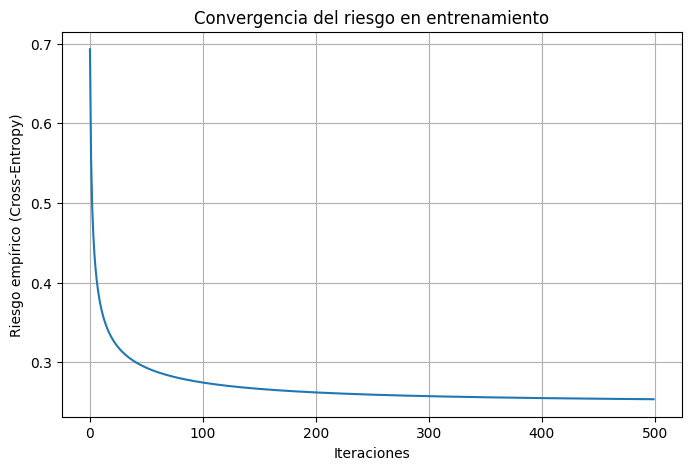

In [ ]:
# Entrenar regresión logística
modelo = RegresionLogistica(num_iters=500, lr=0.05)
modelo.fit(x_train_norm, y_train_par)

plt.figure(figsize=(8,5))
plt.plot(modelo.riesgo_train)
plt.xlabel("Iteraciones")
plt.ylabel("Riesgo empírico (Cross-Entropy)")
plt.title("Convergencia del riesgo en entrenamiento")
plt.grid(True)
plt.show()

In [ ]:
#Reportar Accuracy y cross entropy de entrenamiento y testeo (contar cuantas veces acierto y hacer la cross entropy, cuanto me alejo.)
print("Accuracy:", modelo.accuracy(x_test_norm, y_test_par))
print("Cross-entropy:", modelo.cross_entropy(x_test_norm, y_test_par))

Accuracy: 0.9005
Cross-entropy: 0.2570574423388586


##e) Curva ROC: A partir de la salida de predict_proba del conjunto de testeo, implementar la curva ROC.

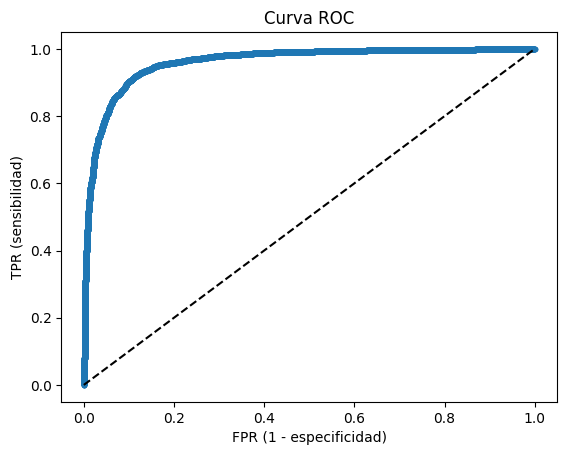

In [28]:
def roc_curve(y_true, y_scores, num_thresholds=100):
   # thresholds = np.linspace(0, 1, num_thresholds)
    thresholds = np.sort(y_scores)
    tpr_list = []
    fpr_list = []

    for t in thresholds:
        y_pred = (y_scores >= t).astype(int)
        TP = np.sum((y_true == 1) & (y_pred == 1)) #Dije par y es par
        FP = np.sum((y_true == 0) & (y_pred == 1)) #Predije par y era impar
        TN = np.sum((y_true == 0) & (y_pred == 0)) #Dije impar y era impar
        FN = np.sum((y_true == 1) & (y_pred == 0)) #Dije Par y es impar

        TPR = TP / (TP + FN) #De cuantos positivos reales, cuantos predije bien. ver pos/ tot pos
        FPR = FP / (FP + TN) #De todos los negativos reales cuantos me confundi como pos. ver neg/ tot neg

        tpr_list.append(TPR)
        fpr_list.append(FPR)

    return np.array(fpr_list), np.array(tpr_list), thresholds

y_scores = modelo.predict_proba(x_test_norm)
fpr, tpr, thresholds = roc_curve(y_test_par, y_scores/100)

# Graficar
plt.plot(fpr, tpr, marker='.')
plt.plot([0,1], [0,1], 'k--')  # línea diagonal de referencia
plt.xlabel("FPR (1 - especificidad)")
plt.ylabel("TPR (sensibilidad)")
plt.title("Curva ROC")
plt.show()

El relevamiento de los puntos con el umbral por la curva denota que el modelo funciona de manera correcta, con alto true positive rate y bajos false positive rate para ciertos umbrales, por lo que vimos en la teorica se podria tomar el punto mas cercano del 1,0 (ideal).


Cuando el umbral de decision es muy bajo (se toma el predict proba y se convierte en un "es par"), se predicen todos los valores como pares que es un valor aleatorio (linea punteada). Cuando sube el umbral de decision el TPR se mantiene casi constante mientras el FPR baja en mayor medida ya que empezamos a acertar en los pares pero dejamos de decir que es todo par. En el caso extremo, cuando pedimos que un numero es solo par cuando su probabilidad es 1 (imposible), tenemos un FPR de 0 y TPR de 0 (FPR no detecta pares pero tampoco los confunde con impares).